<a href="https://colab.research.google.com/github/tomdaler/Machine-Learning/blob/main/Regression/GaussianProcessRegressor_with_Bayesian_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GaussianProcessRegressor with Bayesian Optimizer

In [ ]:
!pip install modal
from modAL.models import BayesianOptimizer
from modAL.acquisition import optimizer_EI, max_EI


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

%matplotlib inline


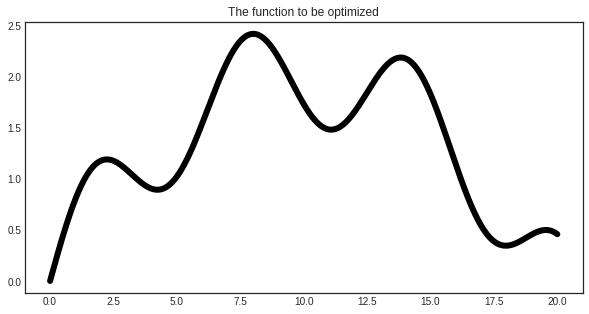

In [ ]:
# SIMULAR DATOS
X = np.linspace(0, 20, 1000).reshape(-1, 1)
y = np.sin(X)/2 - ((10 - X)**2)/50 + 2
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.plot(X, y, c='k', linewidth=6)
    plt.title('The function to be optimized')
    plt.show()


In [ ]:
# assembling initial training set
X_initial, y_initial = X[150].reshape(1, -1), y[150].reshape(1, -1)

# defining the kernel for the Gaussian process
kernel = Matern(length_scale=1.0)
regressor = GaussianProcessRegressor(kernel=kernel)


In [ ]:
# initializing the optimizer
optimizer = BayesianOptimizer(
    estimator=regressor,
    X_training=X_initial, y_training=y_initial,
    query_strategy=max_EI
)


In [ ]:
# Bayesian optimization
for n_query in range(5):
    query_idx, query_inst = optimizer.query(X)
    optimizer.teach(X[query_idx].reshape(1, -1), y[query_idx].reshape(1, -1))

y_pred, y_std = optimizer.predict(X, return_std=True)
y_pred, y_std = y_pred.ravel(), y_std.ravel()



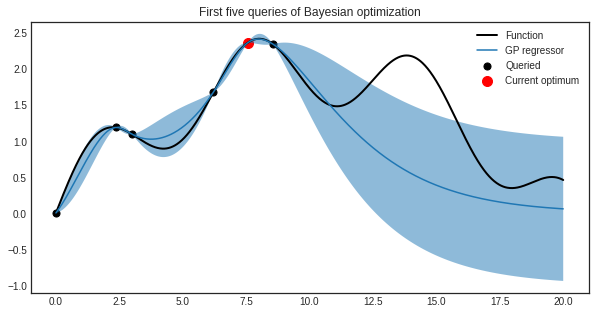

In [ ]:
with plt.style.context('seaborn-white'):

    X_max, y_max = optimizer.get_max()

    plt.figure(figsize=(10, 5))
    plt.scatter(optimizer.X_training, optimizer.y_training, c='k', s=50, label='Queried')
    plt.scatter(X_max, y_max, s=100, c='r', label='Current optimum')

    plt.plot(X.ravel(), y, c='k', linewidth=2, label='Function')
    plt.plot(X.ravel(), y_pred, label='GP regressor')

    plt.fill_between(X.ravel(), y_pred - y_std, y_pred + y_std, alpha=0.5)
    plt.title('First five queries of Bayesian optimization')
    plt.legend()
    plt.show()
